In [55]:
import pandas as pd

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories
Analyse Exploratoire des Données

In [56]:
# importation des librairy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans



In [57]:
# importation des données
df = pd.read_csv("Wholesale customers data.csv")
# Afficher les 5 premier 
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<Axes: xlabel='Channel'>

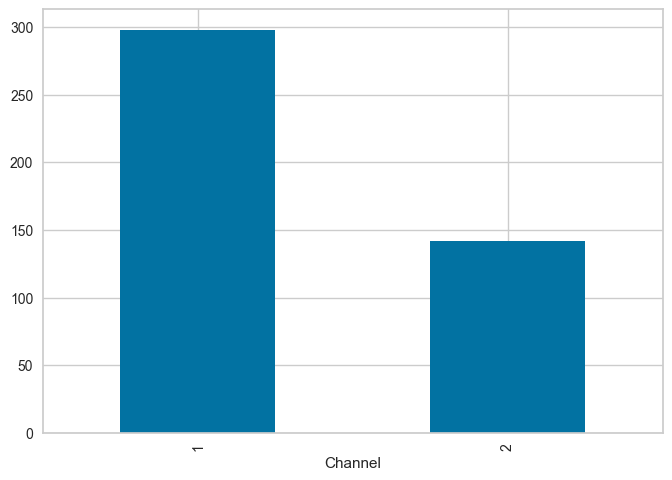

In [58]:
# type de chaine distribution
df['Channel'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

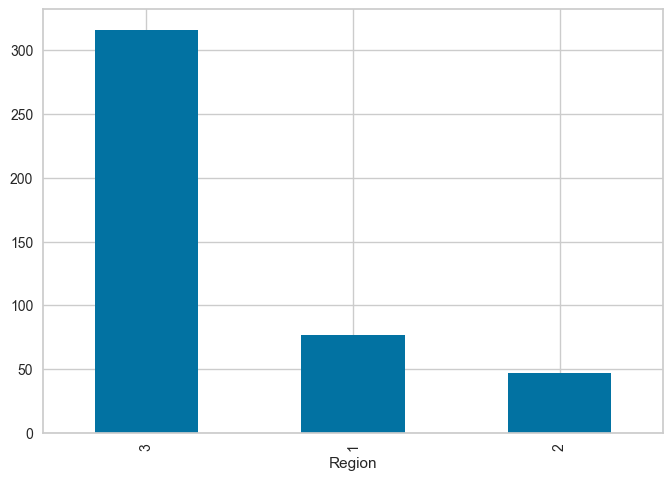

In [59]:
#  Region des clients
df['Region'].value_counts().plot(kind='bar')

In [60]:
# quelques changement de nom variable et de variable
df = df.rename(columns={'Delicassen':'Delicatessen'}) # epicerie fine
df['Channel'] = df['Channel'].map({1: 'HoReCa',2: 'Retail'}) # ventes en detail
df['Region']  = df['Region'].map({1:'Lisbon',2: 'Porto', 3: 'Other' })

In [61]:
# table de frequence du variable "Region"
df['Region'].value_counts()

Region
Other     316
Lisbon     77
Porto      47
Name: count, dtype: int64

In [62]:
# table de frequence du variable "Region" normalise
df['Region'].value_counts(normalize=True)


Region
Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: proportion, dtype: float64

In [63]:
# liste des colonnes
features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [64]:
# statistique descriptive 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


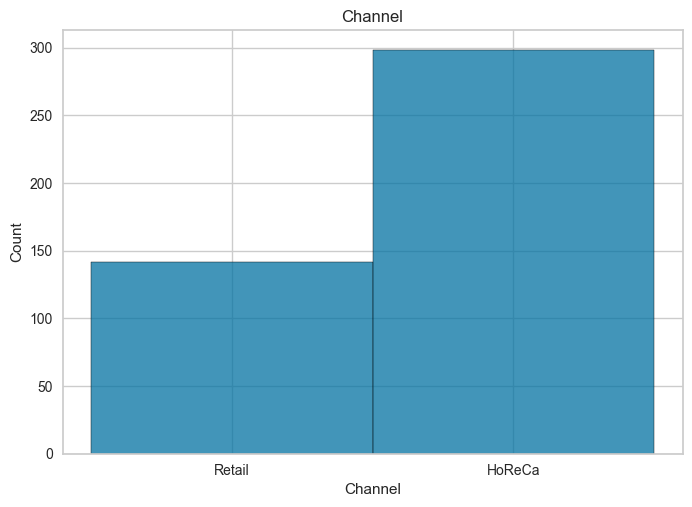

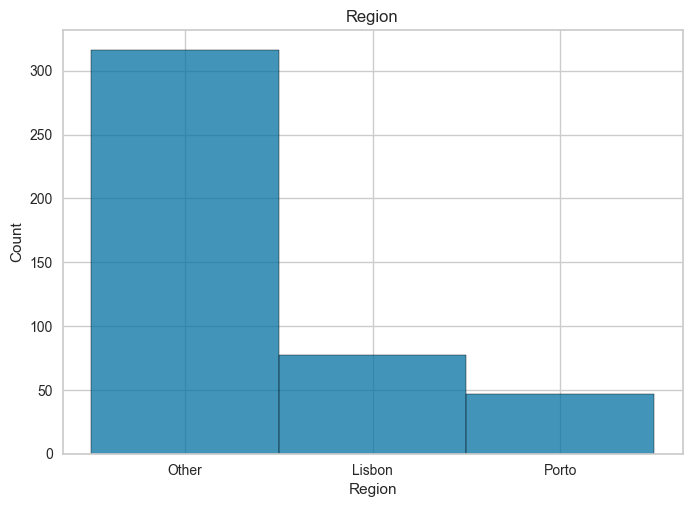

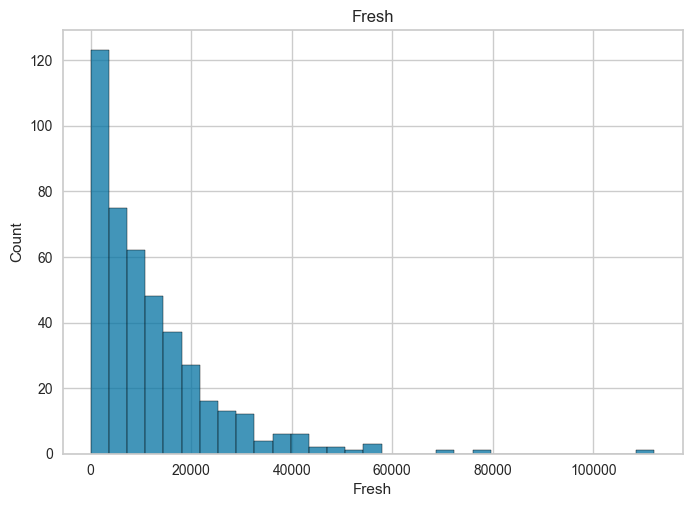

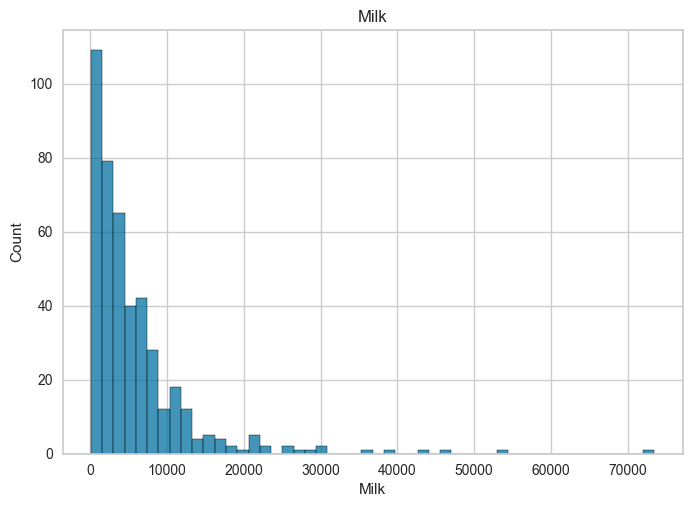

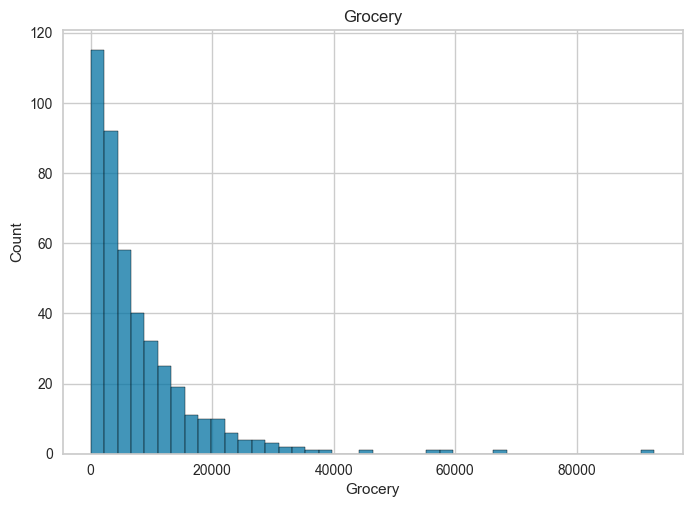

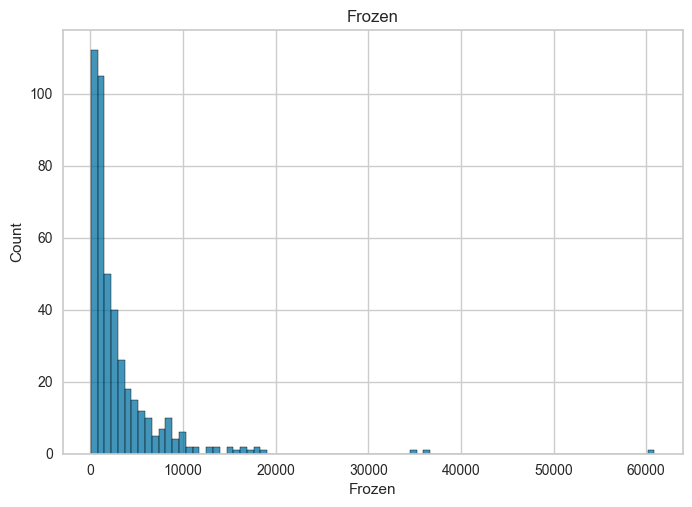

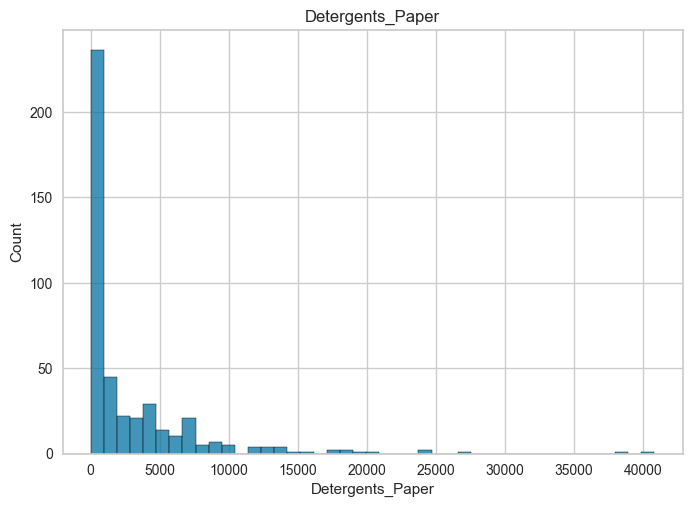

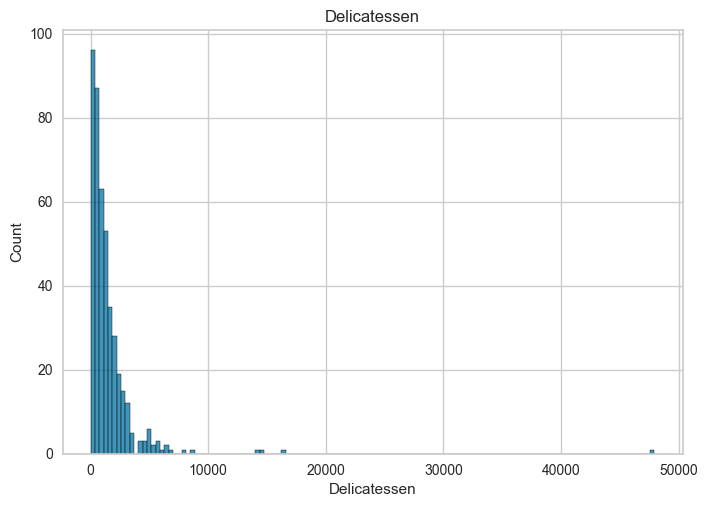

In [66]:
# diagramme et histograme
for feature in features:
    if('feature'=='Channel') | ('feature'=='Region'):
        sns.countplot(feature).set_title(feature)
        plt.show()
    else:
        sns.histplot(df[feature]).set_title(feature)
        plt.show()
                                                

C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


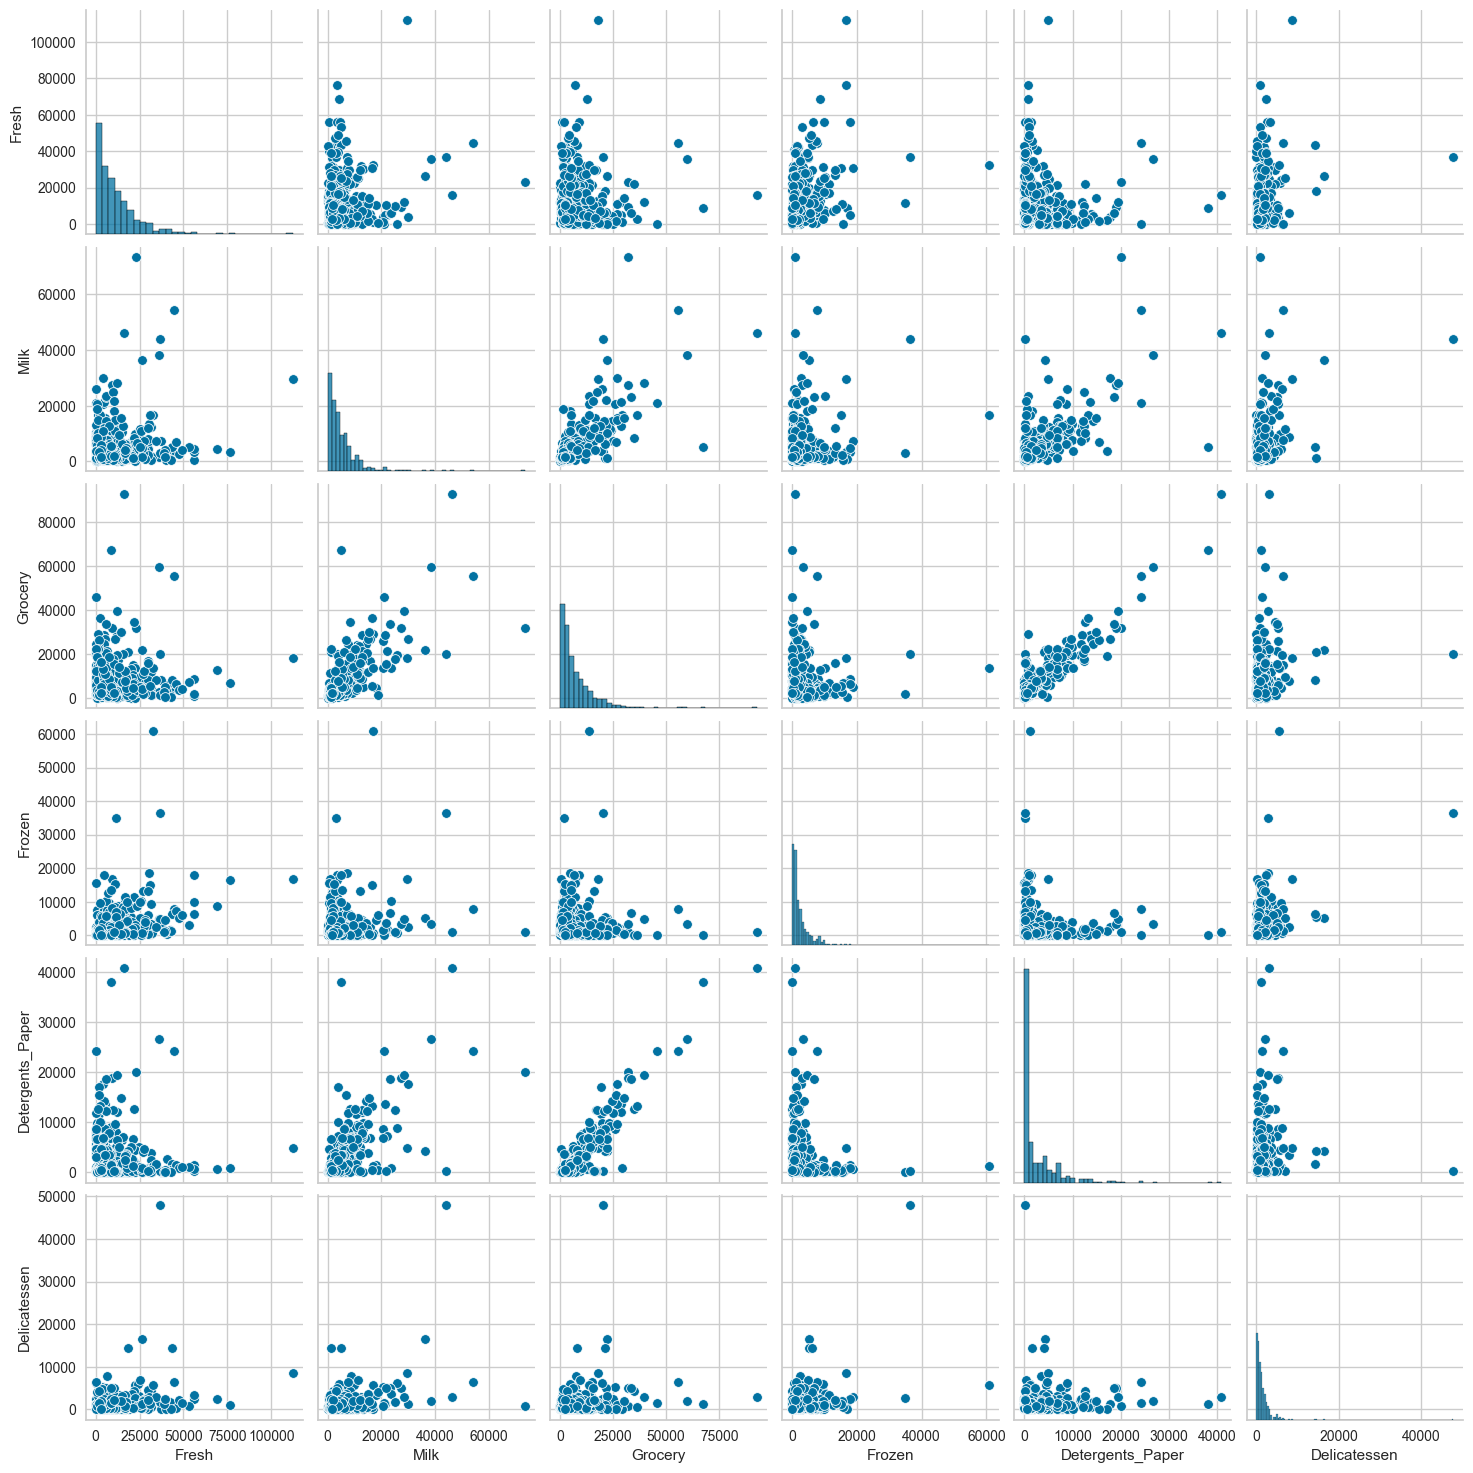

In [67]:
sns.pairplot(df)

<Axes: >

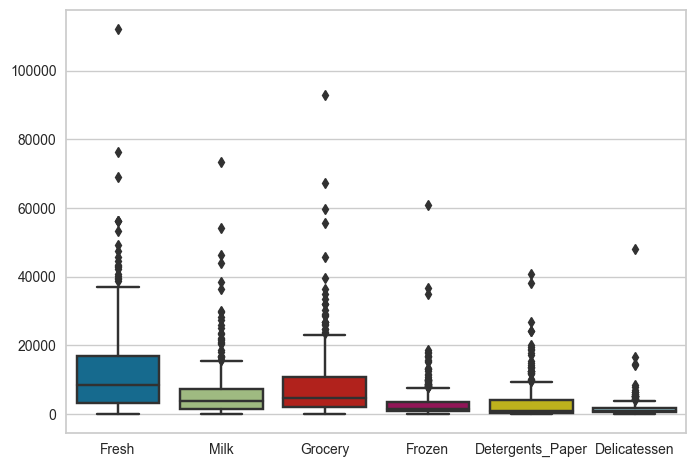

In [68]:
sns.boxplot(df)

*  ACP   

In [69]:
# supprimer les variable channel et region
df = df.drop(['Channel','Region'],axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [70]:
# Normalisation des données 
sacler = StandardScaler()
data = sacler.fit_transform(df)
type(data)

numpy.ndarray

In [71]:
# Afficher les data 
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [72]:
# sauvegarder la table 
np.save('train_data.py',data)

In [73]:
# Application de l'ACP à trois dimensions (3 composants)
pca = PCA(n_components=3)
res_pca = pca.fit_transform(data)
res_pca


array([[ 0.19329055, -0.30509996, -0.14087845],
       [ 0.4344199 , -0.32841262,  0.31900662],
       [ 0.81114323,  0.8150957 ,  1.52341562],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141],
       [-0.91802273, -0.03004659,  0.25840805],
       [-1.10513709, -0.86133787,  0.30515404]])

C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


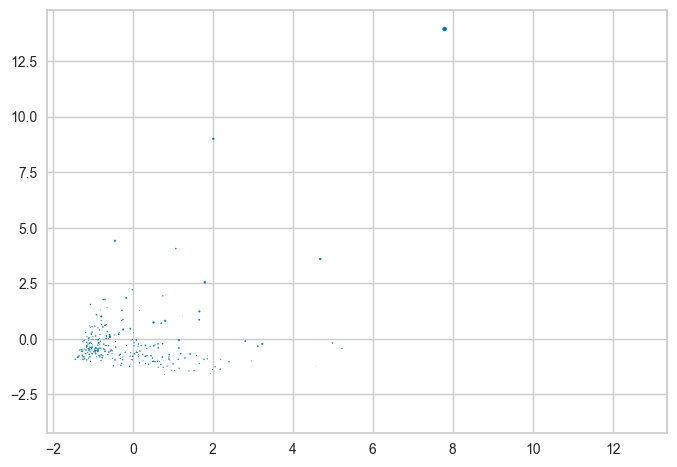

In [74]:
# visualisation des composants 
plt.scatter(res_pca[:,0], res_pca[:,1],res_pca[:,2])

In [75]:
# Application de l'ACP à deux dimensions (2 composants)
pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)
res_pca


array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

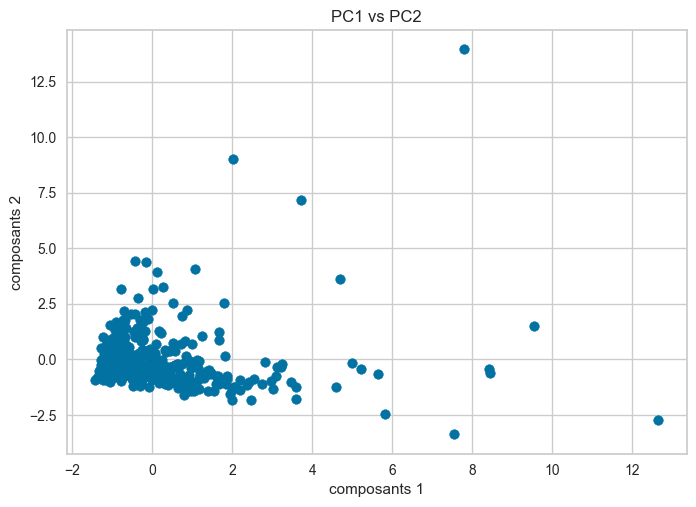

In [76]:
# visualisation  2 composants
plt.scatter(res_pca[:,0], res_pca[:,1])
plt.xlabel('composants 1')
plt.ylabel('composants 2')
plt.title('PC1 vs PC2')
plt.show()

In [77]:
# coefficient pearsonr
pearsonr(res_pca[:,0],res_pca[:,1])[0]

1.8319241650224943e-16

* ACP Non lineaire

In [78]:
# chargement des données train_data.py
data = np.load('train_data.py.npy')
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [79]:
# KPCA avec noyau 'rbf'
Kpca = KernelPCA(n_components=2,kernel='rbf')
res_kpca = Kpca.fit_transform(data)
res_kpca

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

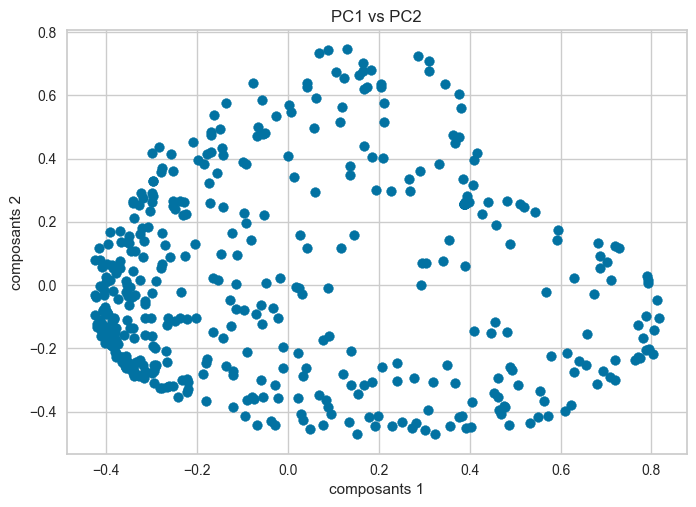

In [80]:
# Visualisation du nuage de point des composants PC1 vs PC2
plt.scatter(res_kpca[:,0], res_kpca[:,1])
plt.xlabel('composants 1')
plt.ylabel('composants 2')
plt.title('PC1 vs PC2')
plt.show()

In [81]:
# coefficient de correlation de pearson
pearsonr(res_kpca[:,0],res_kpca[:,1])[0]

1.2354009610788203e-17

In [82]:
# Ajouter les composant principal au niveau df
df['x_res_kpca'] = res_kpca[:,0]
df['y_res_kpca'] = res_kpca[:,1]

In [83]:
# afficher 
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_res_kpca,y_res_kpca
0,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,22615,5410,7198,3915,1777,5185,0.136617,0.375279


* KMeans clustering avec la methode de coude

In [84]:
# clustering avec 5 cluster
cluster_model = KMeans(n_clusters=5)
cluster_model.fit(res_kpca)
cluster = cluster_model.predict(res_kpca)

C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [85]:
# affichage des clusters
cluster

array([3, 3, 0, 4, 0, 1, 1, 3, 1, 2, 3, 1, 0, 2, 0, 1, 3, 1, 0, 1, 4, 1,
       0, 0, 0, 1, 1, 1, 2, 0, 4, 1, 4, 0, 1, 3, 0, 2, 2, 0, 0, 4, 2, 2,
       3, 2, 2, 0, 3, 2, 1, 1, 0, 3, 4, 1, 0, 2, 1, 3, 3, 0, 3, 2, 1, 0,
       3, 3, 1, 1, 4, 0, 4, 4, 3, 4, 1, 2, 1, 1, 1, 2, 3, 4, 1, 0, 0, 0,
       4, 4, 1, 4, 0, 0, 3, 1, 3, 1, 1, 4, 2, 2, 3, 0, 1, 4, 3, 2, 3, 2,
       1, 2, 4, 4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 3, 0, 0, 4, 0, 3, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 4, 0, 0, 4, 4, 2, 1, 1, 1, 4, 4, 1, 4, 1,
       1, 2, 2, 4, 3, 2, 3, 1, 4, 2, 3, 2, 3, 1, 1, 1, 2, 2, 3, 2, 1, 3,
       0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 1, 3, 3, 3, 4, 1, 1, 2, 1, 4, 0, 3,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 3, 3, 2, 4, 0, 1, 3, 3, 2, 2, 4, 2, 1,
       4, 3, 4, 1, 1, 1, 4, 1, 1, 4, 4, 3, 4, 1, 4, 1, 1, 4, 1, 0, 0, 4,
       4, 1, 3, 2, 1, 4, 1, 1, 1, 0, 4, 0, 0, 4, 1, 1, 0, 0, 1, 4, 4, 1,
       2, 0, 2, 4, 2, 4, 1, 1, 3, 0, 1, 1, 0, 0, 4, 3, 1, 1, 0, 0, 0, 0,
       1, 4, 4, 0, 1, 1, 1, 2, 4, 1, 4, 1, 3, 1, 1,

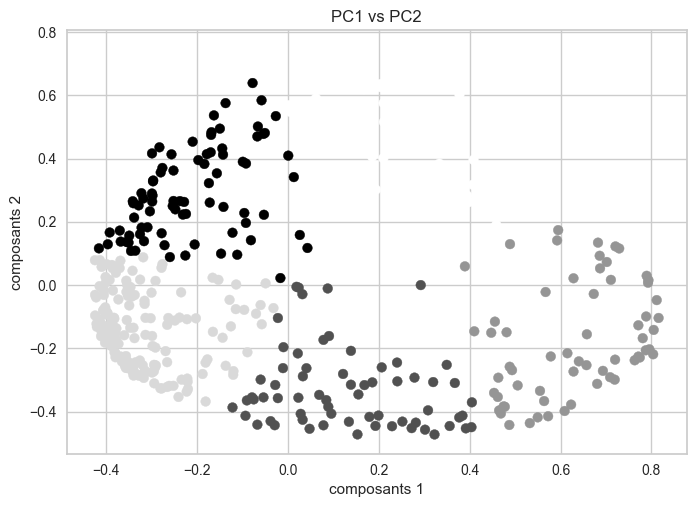

In [86]:
# visualisation
plt.scatter(res_kpca[:,0], res_kpca[:,1], c=cluster)
plt.xlabel('composants 1')
plt.ylabel('composants 2')
plt.title('PC1 vs PC2')
plt.show()

In [87]:
pip install yeLLowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\BILLO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [88]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

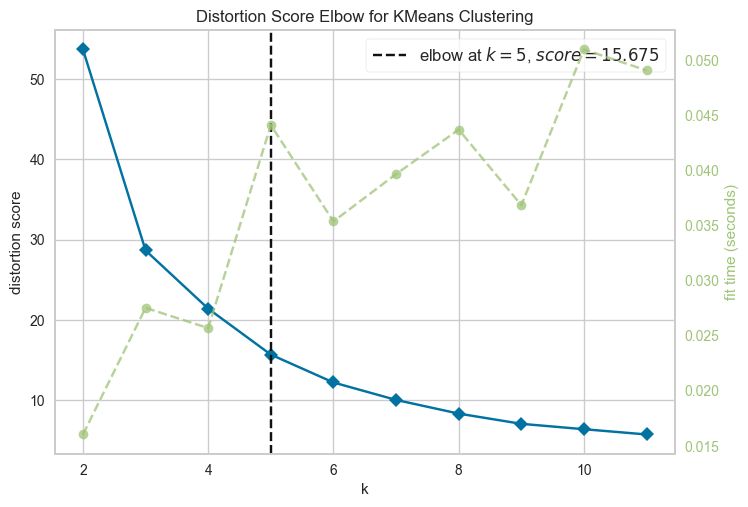

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
# methode de coude
Kmeans = KMeans()
visualizer = KElbowVisualizer(Kmeans, k=(2,12))
visualizer.fit(res_kpca)
visualizer.show()

In [90]:
# sauvegarder
df['cluster_kpca'] = cluster
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_res_kpca,y_res_kpca,cluster_kpca
0,12669,9656,7561,214,2674,1338,0.078374,-0.173115,3
1,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,3
2,6353,8808,7684,2405,3516,7844,0.341702,0.075048,0
3,13265,1196,4221,6404,507,1788,-0.253304,0.250352,4
4,22615,5410,7198,3915,1777,5185,0.136617,0.375279,0
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0.376162,0.466779,0
436,39228,1431,764,4510,93,2346,0.130231,0.745111,0
437,14531,15488,30243,437,14841,1867,0.720747,0.122400,2
438,10290,1981,2232,1038,168,2125,-0.352004,-0.033909,1


In [95]:
df.groupby(['cluster_kpca']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_res_kpca,y_res_kpca
cluster_kpca,,,,,,,,
0,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192,0.269072,0.422852
1,6538.062893,2390.238994,2977.622642,1705.238994,693.496855,844.452830,-0.314677,-0.138485
2,5357.064516,11624.112903,19493.741935,1360.161290,8571.064516,1598.661290,0.629501,-0.174067
3,5010.815385,6713.061538,9540.538462,1217.676923,3856.338462,1197.492308,0.131161,-0.329000
4,17569.506173,2351.679012,3157.061728,4259.222222,554.802469,1123.481481,-0.211891,0.288001


* conclusion:
l'entreprise distribue plus de produit dans les hotels que dans le restaurants traditionel.
les produits qui rapportent plus d'argent à l'entreprise sont: les produits frais, latiers, epicers